# Домашнее задание 1

Ганеева Вероника, БКЛ181

## Работа с синсетами

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import wordnet as wn
import networkx as nx
from collections import Counter
from itertools import *

Мною был избран глагол сотворения, потому что я ожидала, что в нём будет достаточно гипонимов. Ожидания оправдались.

In [3]:
synset_create = wn.synset('create.v.01').hyponyms()
len(synset_create)

58

Далее я не буду обходить подузлы этого синсета, так как гипонимов в нём и так много, и ограничусь одним слоем.

In [4]:
%%time
lang_list = wn.langs()
dict_of_syns = {}
for syn_pair in combinations(synset_create, 2):
    for lang in lang_list:
        shift = len(set(syn_pair[0].lemma_names(lang)) & set(syn_pair[1].lemma_names(lang)))
        if shift > 0:
            if syn_pair in dict_of_syns:
                dict_of_syns[syn_pair] += shift
            else:
                dict_of_syns[syn_pair] = shift

Wall time: 25.8 s


In [5]:
len(dict_of_syns)

278

## Граф

Здесь мне хотелось назвать вершины именами синсетов, но библиотека выдавала ошибку сравнения строк при попытке передать строки в то, что должно соединять ребро

In [6]:
G = nx.Graph()
G.add_nodes_from(synset_create)
dif = [] #это нам дальше понадобится
for key, value in dict_of_syns.items():
    G.add_edge(key[0], key[1], weight=value)
    dif.extend([key[0], key[1]])

In [7]:
import matplotlib.pyplot as plt 

#надо выбрать способ "укладки" графа: random_layout, shell_layout, spring_layout
pos=nx.shell_layout(G)
#plt.figure(figsize=(15, 20))
 
edge_widths = [w*0.2 for (*edge, w) in G.edges.data('weight')]
nx.draw_networkx_nodes(G, pos, node_color='purple', node_size=20)
nx.draw_networkx_edges(G, pos, width=edge_widths, connectionstyle='arc3, rad=.15', edge_color='Goldenrod')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='Indigo')
plt.axis('off') 
plt.show()

C:\Users\M\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

Иногда анаконда ловит ошибку в этом месте, обычно после перезапуска ядра, и тогда вместо графа она выбрасывает предупреждения о версиях (граф тоже, но не рисуя его). Поэтому граф будет выведен дважды, чтобы точно.

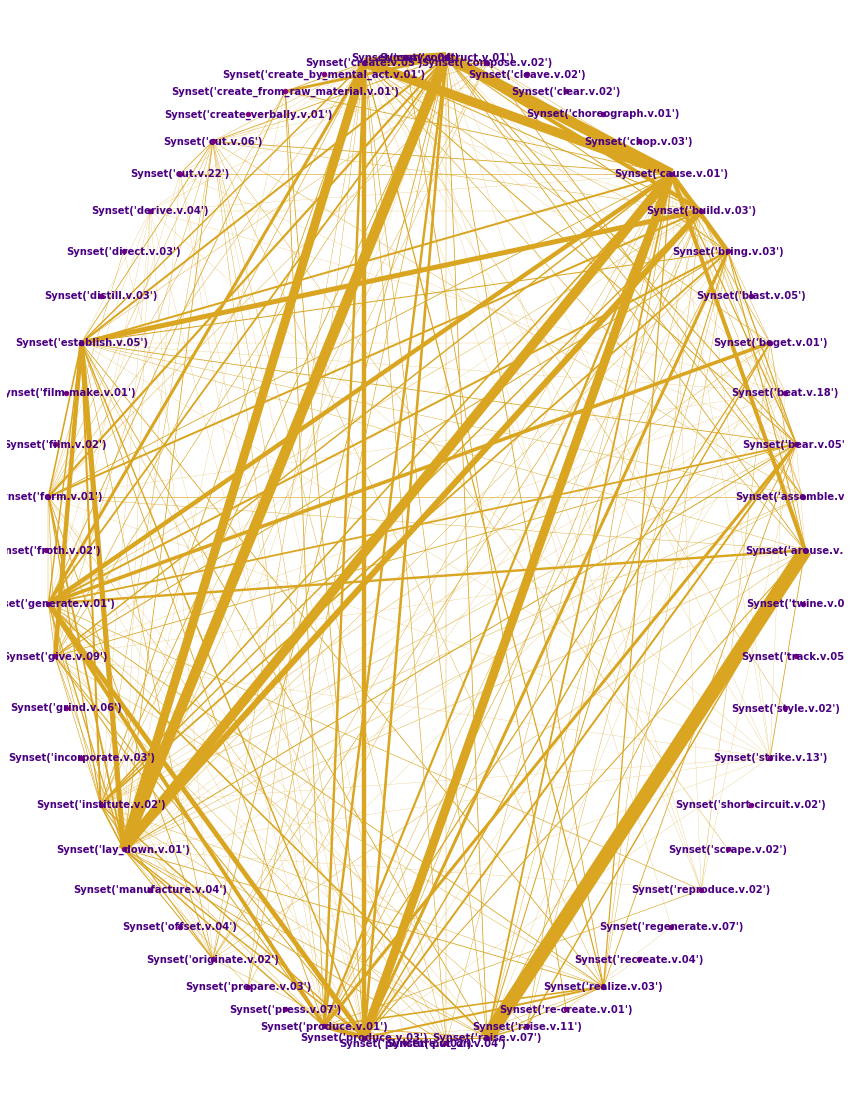

In [8]:
import matplotlib.pyplot as plt 

#надо выбрать способ "укладки" графа: random_layout, shell_layout, spring_layout
pos=nx.shell_layout(G)
plt.figure(figsize=(15, 20))
 
edge_widths = [w*0.2 for (*edge, w) in G.edges.data('weight')]
nx.draw_networkx_nodes(G, pos, node_color='purple', node_size=20)
nx.draw_networkx_edges(G, pos, width=edge_widths, connectionstyle='arc3, rad=.15', edge_color='Goldenrod')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='Indigo')
plt.axis('off') 
plt.show()

У нас получился граф. Но почему некоторые слова не связаны ни с чем другим вообще? Посмотрим на примере итальянского, к счастью, он второй язык и он здесь представлен

In [9]:
set(synset_create) - set(dif) 

{Synset('blast.v.05'),
 Synset('chop.v.03'),
 Synset('choreograph.v.01'),
 Synset('clear.v.02'),
 Synset('create_by_mental_act.v.01'),
 Synset('create_verbally.v.01'),
 Synset('distill.v.03'),
 Synset('film-make.v.01'),
 Synset('film.v.02'),
 Synset('froth.v.02'),
 Synset('grind.v.06'),
 Synset('offset.v.04'),
 Synset('press.v.07'),
 Synset('short-circuit.v.02'),
 Synset('track.v.05'),
 Synset('twine.v.03')}

In [10]:
wn.synset('create_by_mental_act.v.01').hyponyms()

[Synset('construct.v.04'),
 Synset('construct.v.05'),
 Synset('design.v.04'),
 Synset('draw.v.04'),
 Synset('evolve.v.01'),
 Synset('gestate.v.01'),
 Synset('give_birth.v.02'),
 Synset('imagine.v.01'),
 Synset('invent.v.01'),
 Synset('plan.v.03'),
 Synset('program.v.02'),
 Synset('re-create.v.03'),
 Synset('schematize.v.01'),
 Synset('think_up.v.01'),
 Synset('write.v.10')]

In [11]:
for i in synset_create:
    print({i.name(): i.lemma_names('ita')})

{'arouse.v.01': ['accendere', 'destare', 'evocare', 'fare', 'fomentare', 'ispirare', 'provocare', 'solleticare', 'suscitare']}
{'assemble.v.01': ['assemblare', 'montare', 'raccogliere', 'unire']}
{'bear.v.05': []}
{'beat.v.18': []}
{'beget.v.01': ['generare']}
{'blast.v.05': []}
{'bring.v.03': ['avere', 'portare']}
{'build.v.03': []}
{'cause.v.01': ['arrecare', 'cagionare', 'causare', 'fare', 'motivare', 'occasionare', 'proccurare', 'procurare', 'produrre', 'provocare', 'recare', 'rendere', 'suscitare', 'sviluppare']}
{'chop.v.03': []}
{'choreograph.v.01': []}
{'clear.v.02': []}
{'cleave.v.02': []}
{'compose.v.02': ['comporre', 'scrivere']}
{'construct.v.01': ['congegnare', 'costruire', 'fabbricare', 'fare']}
{'copy.v.04': []}
{'create.v.05': ['fare']}
{'create_by_mental_act.v.01': []}
{'create_from_raw_material.v.01': []}
{'create_verbally.v.01': []}
{'cut.v.06': []}
{'cut.v.22': []}
{'derive.v.04': []}
{'direct.v.03': ['dirigere']}
{'distill.v.03': []}
{'establish.v.05': ['conferire'

Во-первых, многие синсеты пусты. Возможно, часть глаголов редкие. Также сюда относятся следующие слои синсетов: Во-вторых, есть синсеты,, которые размечены, но в которых не найдётся совпадений с другими в силу их специфичности. Например, здесь это видно на разделе создания фильмов. Два из глаголов -- 'cinematografare', 'filmare' -- специфичны. Третий глагол, 'girare', в основном значении значит "крутить" или "вращать" (интересно, что перенос значения может быть таким же, как в русском, но значения разные -- в русском крутить фильм -- показывать его, в итальянском -- снимать). 

### Связные компоненты

In [12]:
nx.number_connected_components(G)

17

### Плотность и асссортативность

In [13]:
nx.density(G)

0.16817906836055657

In [14]:
nx.degree_assortativity_coefficient(G)

-0.17837704294109882

С одной стороны, граф относительно плотный. С другой -- ассортативность отрицательная. То есть узлы связываются более с непохожими на себя узлами, что довольно логично, см. ниже 

### Узлы

In [15]:
def central(centr):
    top_centr = []
    for node in sorted(centr, key=centr.get, reverse=True)[:10]:
        print(node)
        print(centr[node])
        top_centr.append(node)    
    return set(top_centr)

In [16]:
deg_centr = nx.degree_centrality(G)
deg_centr = central(deg_centr)

Synset('cause.v.01')
0.5263157894736842
Synset('create.v.05')
0.5087719298245614
Synset('lay_down.v.01')
0.5087719298245614
Synset('construct.v.01')
0.49122807017543857
Synset('produce.v.03')
0.45614035087719296
Synset('establish.v.05')
0.43859649122807015
Synset('institute.v.02')
0.40350877192982454
Synset('build.v.03')
0.38596491228070173
Synset('form.v.01')
0.38596491228070173
Synset('generate.v.01')
0.38596491228070173


In [17]:
between_centr = nx.betweenness_centrality(G)
between_centr = central(between_centr)

Synset('reproduce.v.02')
0.09288847117794488
Synset('cut.v.06')
0.07552115108506087
Synset('copy.v.04')
0.07142857142857142
Synset('create.v.05')
0.05508433017831515
Synset('construct.v.01')
0.0451360738954724
Synset('cause.v.01')
0.0415659111147833
Synset('lay_down.v.01')
0.03332656274385598
Synset('originate.v.02')
0.02574293570534172
Synset('re-create.v.01')
0.02506265664160401
Synset('produce.v.01')
0.02451357991771525


In [18]:
close_centr = nx.closeness_centrality(G)
close_centr = central(close_centr)

Synset('cause.v.01')
0.5266290726817042
Synset('create.v.05')
0.5173899661434288
Synset('lay_down.v.01')
0.5173899661434288
Synset('construct.v.01')
0.5084694494857834
Synset('produce.v.03')
0.4608004385964912
Synset('establish.v.05')
0.45371120107962215
Synset('produce.v.01')
0.4468367889420521
Synset('generate.v.01')
0.44016758313694687
Synset('institute.v.02')
0.44016758313694687
Synset('build.v.03')
0.43369453044375644


In [19]:
eigenvector_centr = nx.eigenvector_centrality(G)
eigenvector_centr = central(eigenvector_centr)

Synset('cause.v.01')
0.2575197152622257
Synset('lay_down.v.01')
0.2544226570040112
Synset('create.v.05')
0.2502523304017669
Synset('construct.v.01')
0.24485301797595194
Synset('produce.v.03')
0.24046416321081635
Synset('establish.v.05')
0.23797247673911262
Synset('institute.v.02')
0.2238555789220695
Synset('give.v.09')
0.22153532164030604
Synset('build.v.03')
0.21427150503238174
Synset('generate.v.01')
0.20904816717011707


Мы получили десять самых центральных вершин в разных метриках. Теперь можем сравнить их

In [20]:
eigenvector_centr & close_centr & between_centr & deg_centr

{Synset('cause.v.01'),
 Synset('construct.v.01'),
 Synset('create.v.05'),
 Synset('lay_down.v.01')}

In [21]:
eigenvector_centr | close_centr | between_centr | deg_centr

{Synset('build.v.03'),
 Synset('cause.v.01'),
 Synset('construct.v.01'),
 Synset('copy.v.04'),
 Synset('create.v.05'),
 Synset('cut.v.06'),
 Synset('establish.v.05'),
 Synset('form.v.01'),
 Synset('generate.v.01'),
 Synset('give.v.09'),
 Synset('institute.v.02'),
 Synset('lay_down.v.01'),
 Synset('originate.v.02'),
 Synset('produce.v.01'),
 Synset('produce.v.03'),
 Synset('re-create.v.01'),
 Synset('reproduce.v.02')}

Ожидаемо, наиболеее центральными оказались более "универсальные" и менее специфичные синсеты. К примеру, встреться здесь тот же film или style, или что-то подобное с достаточно узким значением, было бы удивительно. Возможно, можно предположить, что в разных языках скорее узлы с более абстрактными значениями передают свои слова узлам с более узкими значениями, и мы скорее не ожидаем, что один узел с узким значением соберет себе все-все слова узлов с более общим значением.

В целом здесь можно подумать о том, как языкам свойственно образовывать новые слова или получать новые значения. Например, style, который не даёт мне покоя. Или choreograph. Вряд ли все языки сразу стремятся выразить подобное узкое значение так, чтобы в этом положении можно было бы употребить много разных слов. Это может быть выражено чем-то, что +- универсально и употребляется где-то ещё, или какой-либо сдвиг в значении (girare il film), или что-то, что образовано прямо от объекта (filmare), и вряд ли в этом пункте будет много глаголов. То есть такие узлы с узким значением, даже когда получают несколько глаголов, могут иметь совпадения с чем-то более абстрактным, не иметь совпадений, потому что это образовано от объекта (простите меня, пожалуйста, за кривые формулировки) или не иметь совпадений, потому что сдвиг уникален. 

Более абстрактные синсеты, наоборот, могут иметь много слов для выражения чего-то и при этом у них довольно большой вес, потому что а -- эти слова не настолько специфичны и могут выражать ещё значения, и таких же больших узлов, и специфичных; б -- узел с более широким значением модет иметь больше лемм с разными оттенками, и, возможно, может быть употребим более часто (но это надо по корпусам смотреть). Даже на примере итальянского видно, сколь много слов в нём относятся к таким узлам, а также то, что иногда эти слова употребляются в разных случаях, как, например, fare -- делать.

Но в общем -- у нашего графа есть несколько узлов, у которых ооочень сильные связи с другими,  штук семь. О них может быть несколько предположений: либо для них есть общие слова во многих языках, либо в каждом языке есть сразу много пересечений для них, и тогда для них должно быть довольно много слов. Но если смотреть на их рёбра, вероятно, и то, и другое. Есть узлы, которые вообще ни с кем не связаны, вероятно, в силу их специфичности. И есть узлы, у которых достаточно тонких связей -- возможжно, для разных языков в этих узлах находится по слову-другому из другого какого-нибудь узла, для разных языков из разных узлов, и эти соответствия, должно быть, сильно менее регулярны, чем те, что представлены очень весомыми рёбрами.  При этом у узлов с такими рёбрами есть и какие-то тонкие, значит, они не просто "одинаково работают во всех языках", а имеют какие-то более редкие совпадения тоже.

### Сообщества

In [22]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
next(communities_generator)

({Synset('arouse.v.01'),
  Synset('assemble.v.01'),
  Synset('bear.v.05'),
  Synset('beat.v.18'),
  Synset('beget.v.01'),
  Synset('bring.v.03'),
  Synset('build.v.03'),
  Synset('cause.v.01'),
  Synset('cleave.v.02'),
  Synset('compose.v.02'),
  Synset('construct.v.01'),
  Synset('create.v.05'),
  Synset('create_from_raw_material.v.01'),
  Synset('cut.v.06'),
  Synset('cut.v.22'),
  Synset('derive.v.04'),
  Synset('direct.v.03'),
  Synset('establish.v.05'),
  Synset('form.v.01'),
  Synset('generate.v.01'),
  Synset('give.v.09'),
  Synset('incorporate.v.03'),
  Synset('institute.v.02'),
  Synset('lay_down.v.01'),
  Synset('manufacture.v.04'),
  Synset('originate.v.02'),
  Synset('prepare.v.03'),
  Synset('produce.v.01'),
  Synset('produce.v.03'),
  Synset('puncture.v.02'),
  Synset('put_on.v.04'),
  Synset('raise.v.07'),
  Synset('raise.v.11'),
  Synset('realize.v.03'),
  Synset('reproduce.v.02'),
  Synset('scrape.v.02'),
  Synset('strike.v.13'),
  Synset('style.v.02')},
 {Synset('blas

In [23]:
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(G)

[frozenset({Synset('arouse.v.01'),
            Synset('assemble.v.01'),
            Synset('bear.v.05'),
            Synset('beat.v.18'),
            Synset('beget.v.01'),
            Synset('bring.v.03'),
            Synset('build.v.03'),
            Synset('cause.v.01'),
            Synset('cleave.v.02'),
            Synset('compose.v.02'),
            Synset('construct.v.01'),
            Synset('create.v.05'),
            Synset('create_from_raw_material.v.01'),
            Synset('cut.v.06'),
            Synset('cut.v.22'),
            Synset('derive.v.04'),
            Synset('direct.v.03'),
            Synset('establish.v.05'),
            Synset('form.v.01'),
            Synset('generate.v.01'),
            Synset('give.v.09'),
            Synset('incorporate.v.03'),
            Synset('institute.v.02'),
            Synset('lay_down.v.01'),
            Synset('manufacture.v.04'),
            Synset('originate.v.02'),
            Synset('prepare.v.03'),
            Synset('produ

Оба алгоритма с сообществами выделяют нам: одно большое сообщество с многими абстрактными значениями, одно поменьше с тоже относительно неспецифицированными значениями и много специфицированных одиночек. Первое содержит более-менее абстрактное создание в разных видах и формах, второе про восстановление и воссоздание по большей части. Одиночные -- наши любимые фильмы и хореография, а также некоторые другие. Интересно, что воссоздание образует отдельное сообщество, а также интересно, есть ли подсообщества с таким значением в других синсетах. Пожалуй, именно его отделение я бы назвала интересным выводом этой работы.